In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing,load_iris
from sklearn.model_selection import train_test_split
from seedtools import load_seed

## CONTENTS 
 -  Max Depth program 
 -  Feature Importances 

## Max Depth program 

In [91]:
data =  load_seed("Social_Network_Ads.csv","v3",True).data 
x =  data.drop(columns=["Purchased"]).values[:,1:4]
y =  data["Purchased"].values 
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

In [101]:
def max_depth_impact(maxD=None):
    
    model =  DecisionTreeClassifier(max_depth=maxD)
    model.fit(x_train,y_train)
    title = f"Score : {model.score(x_test,y_test)}"
    
    a = np.arange(start=x[:,0].min() + 1,stop= x[:,0].max() + 1,step=0.1)  # feature 1 min and max value
    b = np.arange(start=x[:,1].min() + 1, stop= x[:,1].max() + 1, step=10)  # feature 2 min and max value
    X, Y = np.meshgrid(a, b)
    
    
    array =  np.array([X.ravel(),Y.ravel()]).T
    
    pred =  model.predict(array)
    
    plt.title(title)
    plt.contourf(X,Y,pred.reshape(X.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1],c=y)  
    

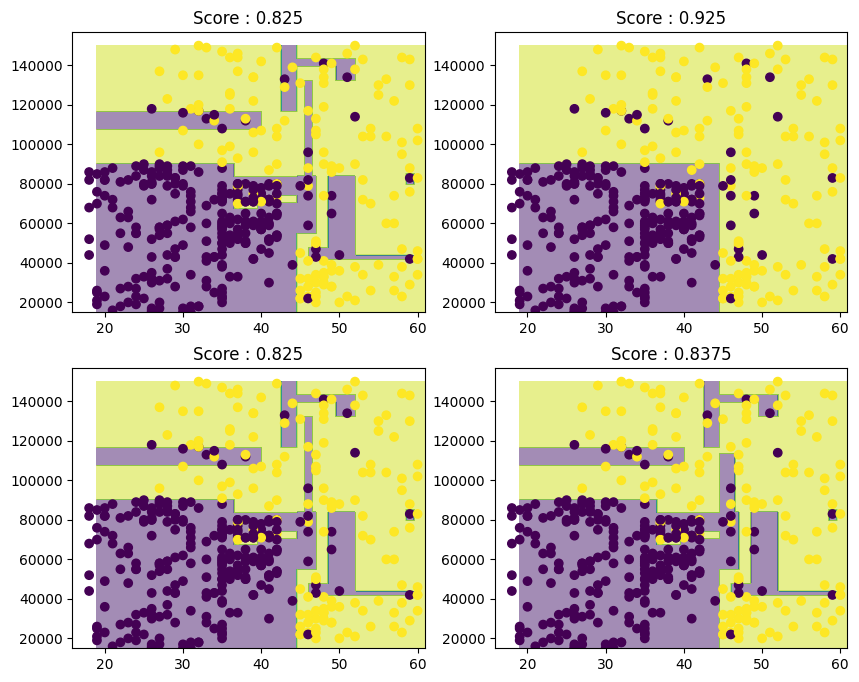

In [104]:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
max_depth_impact(None)


plt.subplot(2,2,2)
max_depth_impact(3)

plt.subplot(2,2,3)
max_depth_impact(15)


plt.subplot(2,2,4)
max_depth_impact(40)


## Feature Importances 

In [114]:
data =  fetch_california_housing()
x =  data.data 
y =  data.target
target_names =  data.feature_names
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

In [106]:
model =  DecisionTreeRegressor()
model.fit(x_train,y_train)
preds =  model.predict(x_test)
print("Score :",model.score(x_test,y_test))
print("R2 Score :",r2_score(y_test,preds))

Score : 0.5927183904363712
R2 Score : 0.5927183904363712


In [116]:
for importance, name in sorted(zip(model.feature_importances_, target_names),reverse=True):
  print (name, importance)

MedInc 0.5207733043908797
AveOccup 0.13567194289568685
Latitude 0.09498347214994066
Longitude 0.09194815522670788
HouseAge 0.04959353349464308
AveRooms 0.047095109639470056
Population 0.030727184266336523
AveBedrms 0.029207297936335332
